# Exploratory Data Analysis Starter

## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

import numpy as np

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=15,8

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [2]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [3]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [4]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [7]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [8]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [9]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

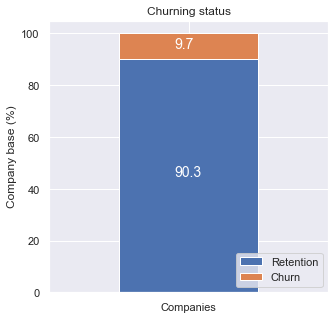

In [10]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()

churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

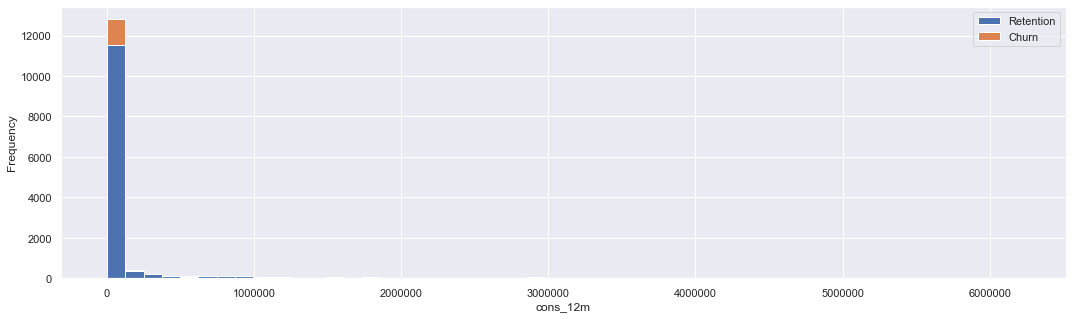

In [11]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

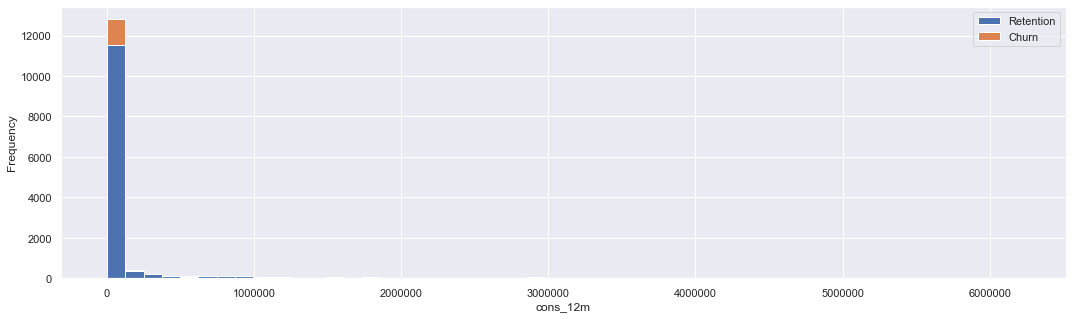

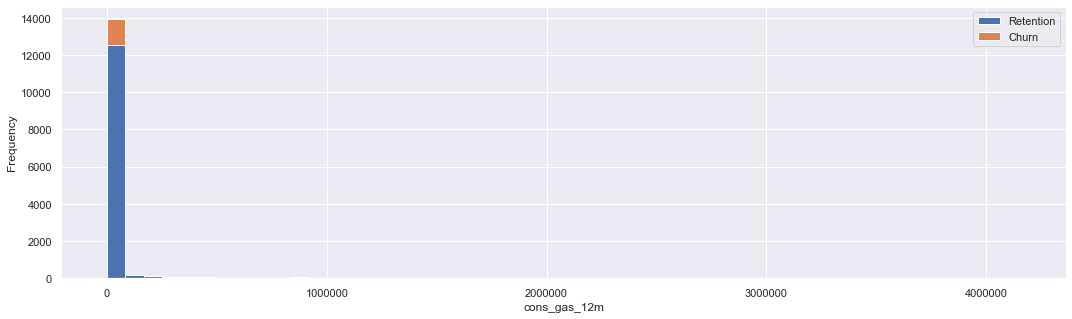

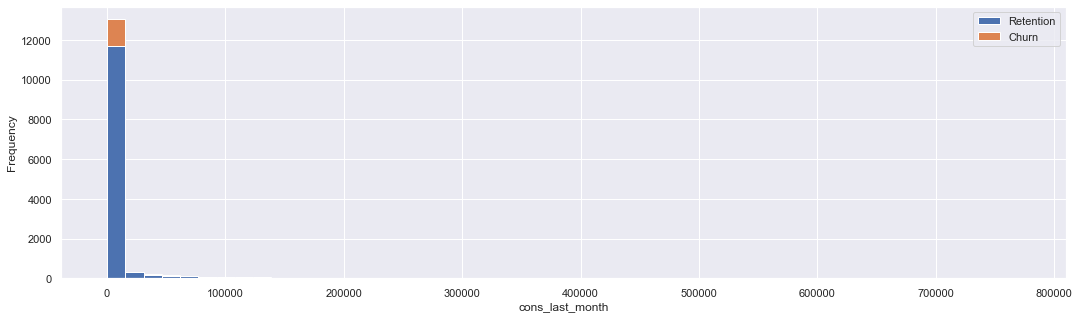

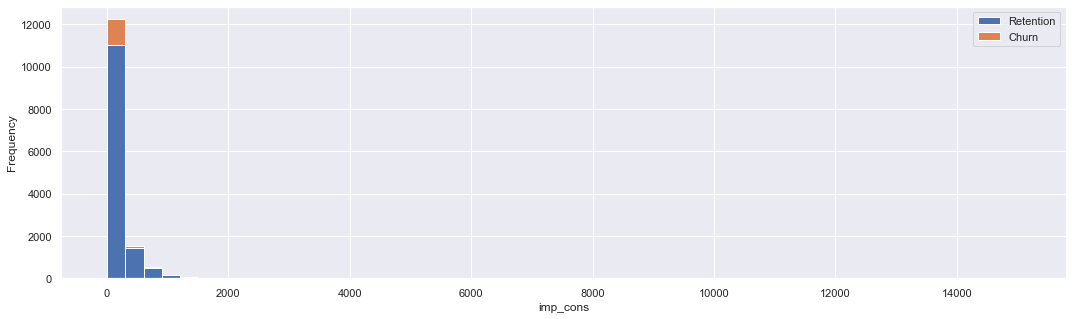

In [12]:
for i in consumption.columns[1:5]:
    fig, axs = plt.subplots(nrows=1, figsize=(18, 5))
    plot_distribution(consumption, i, axs)

In [13]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [14]:
dfc=client_df.copy()

In [15]:
#Missing values 
#dfc.isnull().sum()


In [16]:
### Missing value is absent but they are stored as string in the data.Lets do a value counts to know such things.
### Certain columns require datatype change before proceeding further

In [17]:
dfc.iloc[:,5:9]=dfc.iloc[:,5:9].astype("datetime64[ns]")  #DATETIME object wrongly stored as string
dfc['churn']=dfc['churn'].astype('object')                #categorical column given as int.

In [18]:
#Segregate dataframe to respective datatype
dfc_cat=dfc.select_dtypes('object')
dfc_num=dfc.select_dtypes('number')
dfc_date=dfc.select_dtypes('datetime')

In [19]:
# Lets check for value_counts for cat columns

for i in dfc_cat.columns[1:]:
    print(dfc_cat.loc[:,i].value_counts())
    print('\n\n')
    

foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64



f    11955
t     2651
Name: has_gas, dtype: int64



lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64



0    13187
1     1419
Name: churn, dtype: int64





In [20]:
### MISSING values should be replaced with np.nan
for i in dfc_cat.columns[1:]:
    dfc_cat.loc[:,i].replace({'MISSING':np.nan},inplace=True)
    
    
dfc_cat.isnull().sum()

id                  0
channel_sales    3725
has_gas             0
origin_up          64
churn               0
dtype: int64

In [84]:
yt=dfc.churn.astype('int')

In [83]:
dfc_num.shape

(14606, 17)

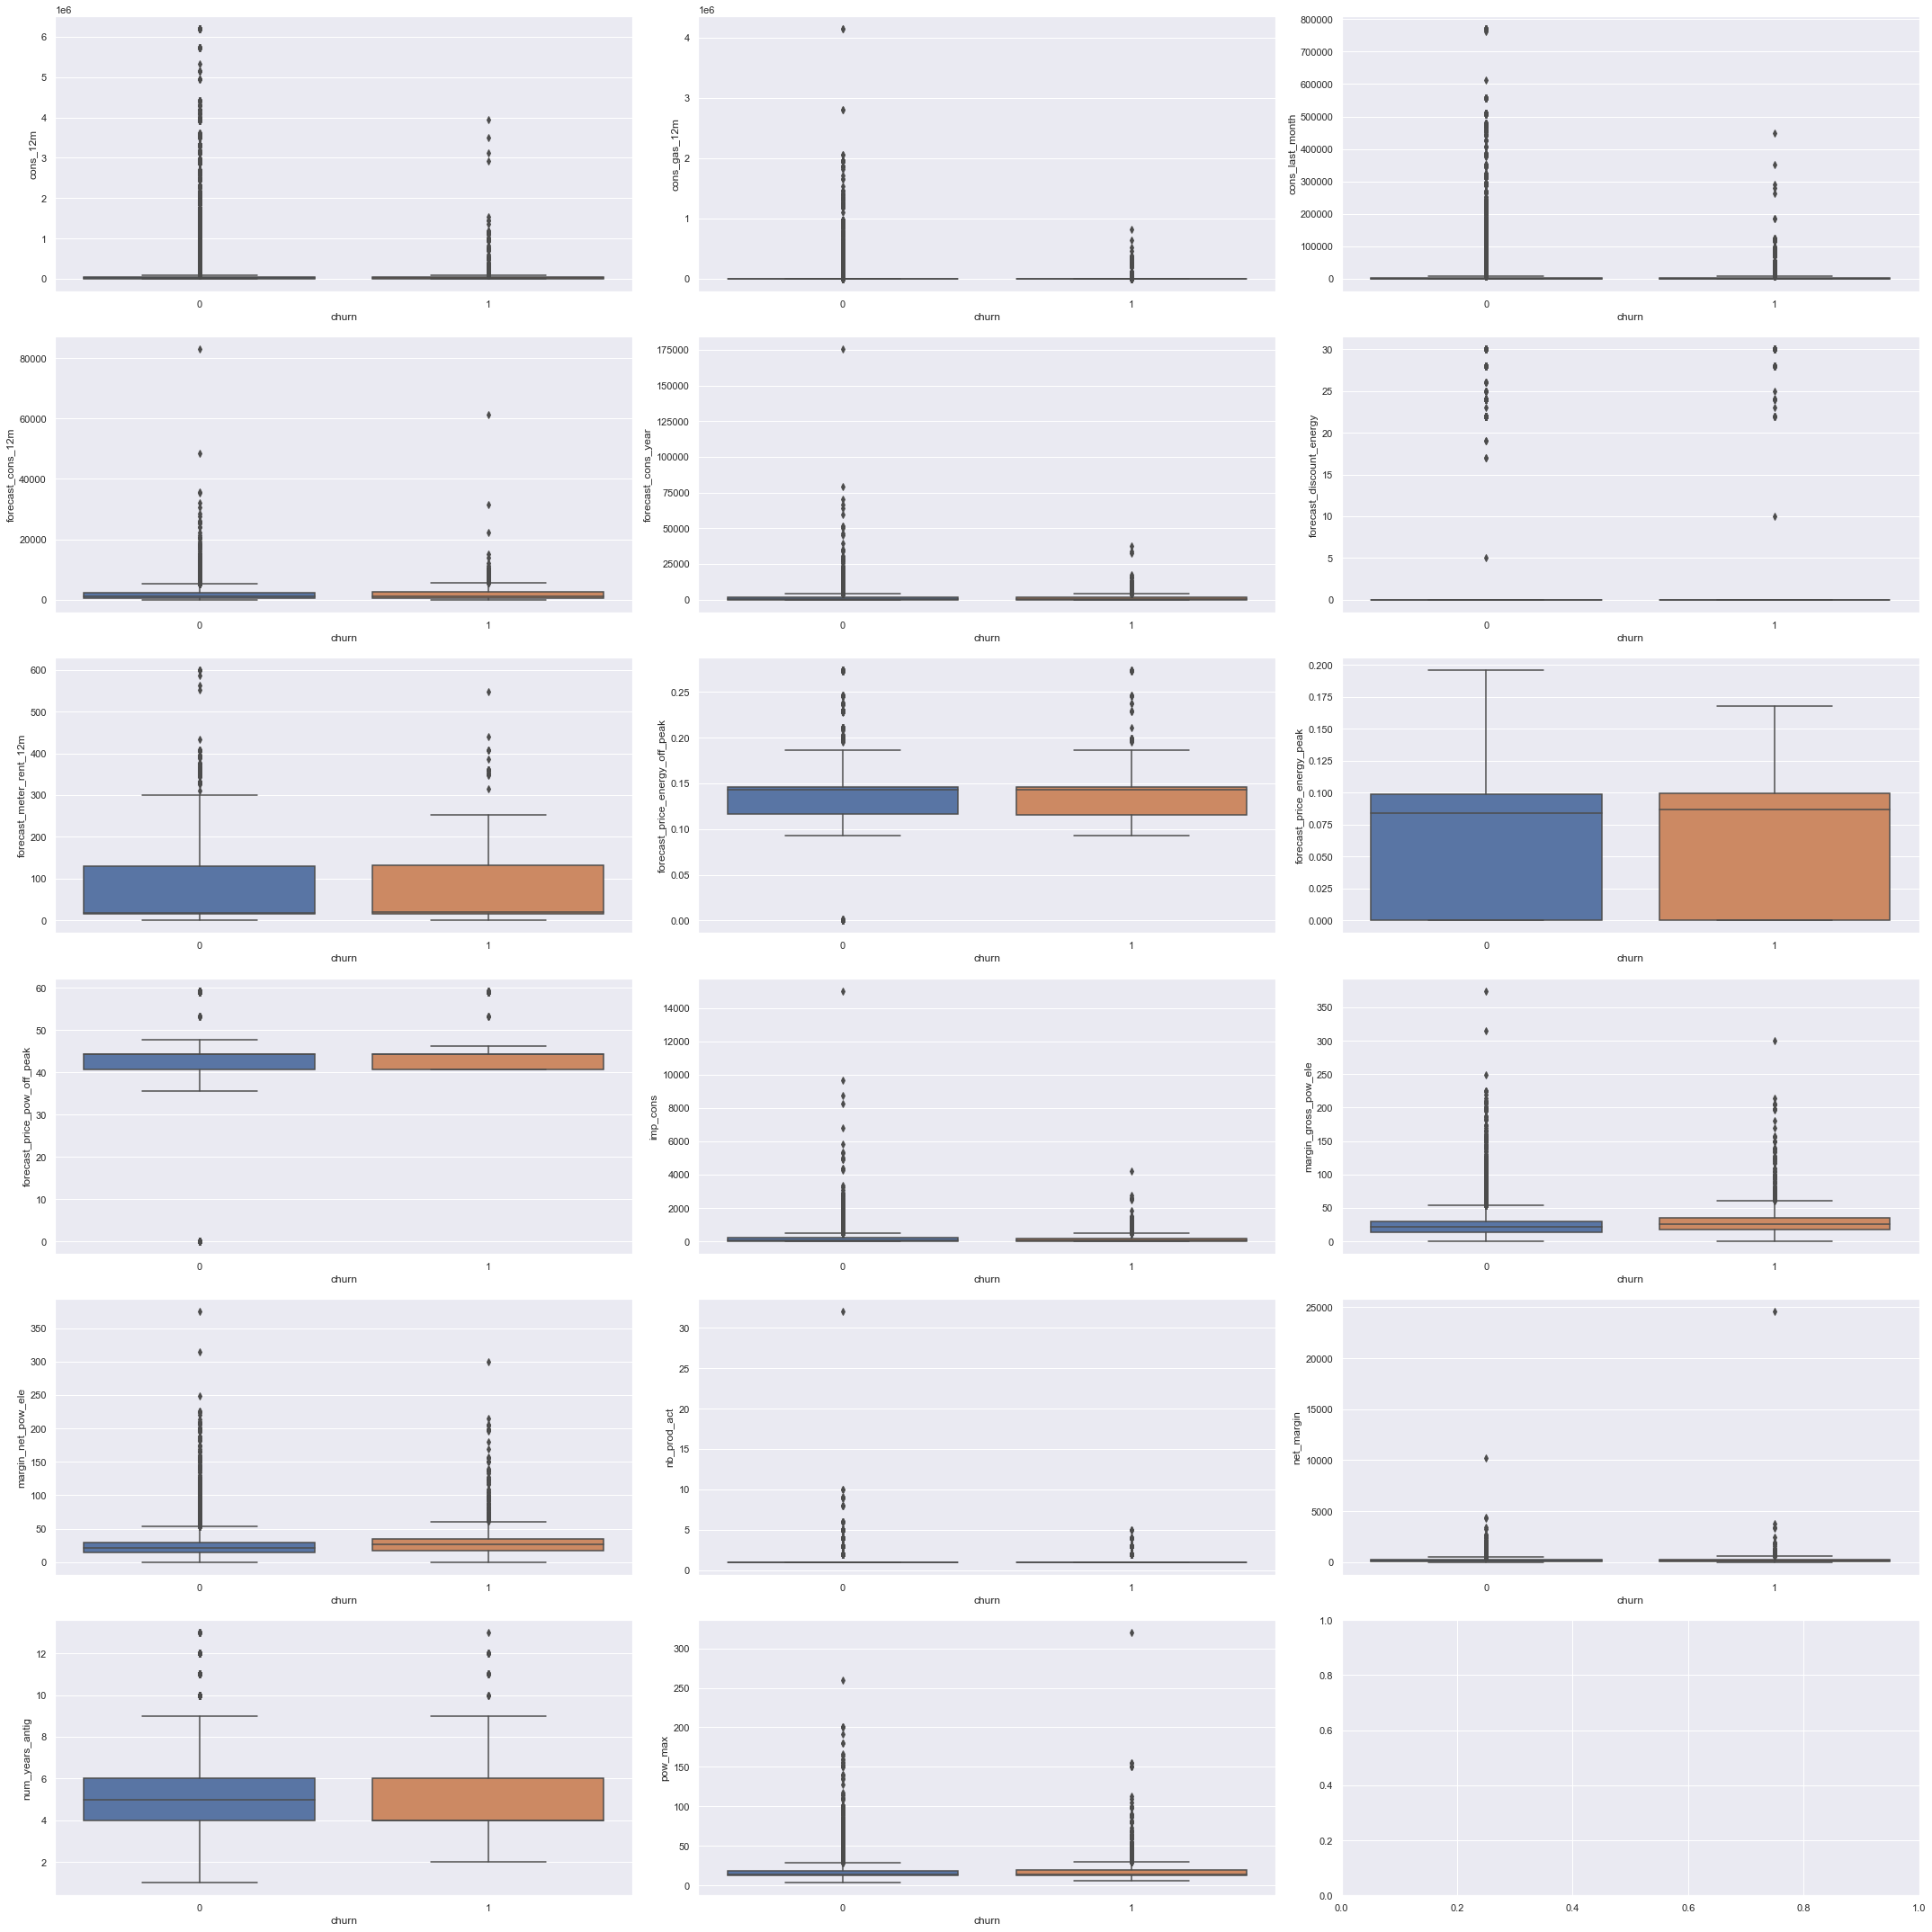

In [87]:
f,ax=plt.subplots(nrows=6, ncols=3,figsize=(30,30))

for variable, subplot in zip(dfc_num.columns,ax.flatten()):
    sns.boxplot(x=yt,y=dfc_num[variable],ax=subplot)
    
plt.tight_layout()

In [90]:
# Only outcome of this plot 'num_years_antig' has a little effect on deciding churn.

In [93]:
dfc_num=pd.concat([dfc_num,y],1)
dfc_num.corr()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
cons_12m,1.000000,0.488474,0.968212,0.193947,0.167093,-0.043282,0.065268,-0.007748,0.145908,-0.026566,0.159711,-0.011926,-0.011905,0.154251,0.133614,-0.003565,0.082889,-0.045968
cons_gas_12m,0.488474,1.000000,0.507007,0.084359,0.080934,-0.012595,0.041393,-0.017684,0.074002,-0.020558,0.077846,0.006868,0.006852,0.239387,0.070867,-0.013815,0.054317,-0.037957
cons_last_month,0.968212,0.507007,1.000000,0.177773,0.193574,-0.040874,0.057476,-0.005187,0.136802,-0.023017,0.187034,-0.011498,-0.011477,0.169099,0.121835,-0.003677,0.074529,-0.045284
forecast_cons_12m,0.193947,0.084359,0.177773,1.000000,0.647727,0.058435,0.305627,-0.135646,0.254056,-0.018477,0.634600,-0.023220,-0.023231,0.055915,0.768537,0.021283,0.393946,0.012949
forecast_cons_year,0.167093,0.080934,0.193574,0.647727,1.000000,0.008518,0.276009,-0.158012,0.251005,-0.044190,0.969395,-0.010759,-0.010727,0.040426,0.464928,0.048248,0.309647,-0.002558
forecast_discount_energy,-0.043282,-0.012595,-0.040874,0.058435,0.008518,1.000000,-0.008388,0.353735,0.059318,0.048024,0.037939,0.241142,0.240421,0.106812,0.079784,-0.070697,-0.005032,0.017026
forecast_meter_rent_12m,0.065268,0.041393,0.057476,0.305627,0.276009,-0.008388,1.000000,-0.579353,0.706376,-0.203089,0.224212,0.183509,0.183566,0.018109,0.275830,0.071558,0.618549,0.044245
forecast_price_energy_off_peak,-0.007748,-0.017684,-0.005187,-0.135646,-0.158012,0.353735,-0.579353,1.000000,-0.330138,0.630377,-0.092535,0.094498,0.094216,0.035093,-0.135107,-0.168095,-0.384397,-0.010837
forecast_price_energy_peak,0.145908,0.074002,0.136802,0.254056,0.251005,0.059318,0.706376,-0.330138,1.000000,-0.242017,0.212317,0.165483,0.165560,0.044141,0.234942,0.080260,0.411532,0.029315
forecast_price_pow_off_peak,-0.026566,-0.020558,-0.023017,-0.018477,-0.044190,0.048024,-0.203089,0.630377,-0.242017,1.000000,-0.011318,-0.061869,-0.061925,-0.005335,-0.072623,-0.120136,-0.095897,0.014778


In [94]:
dfc_num.corr().T

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
cons_12m,1.000000,0.488474,0.968212,0.193947,0.167093,-0.043282,0.065268,-0.007748,0.145908,-0.026566,0.159711,-0.011926,-0.011905,0.154251,0.133614,-0.003565,0.082889,-0.045968
cons_gas_12m,0.488474,1.000000,0.507007,0.084359,0.080934,-0.012595,0.041393,-0.017684,0.074002,-0.020558,0.077846,0.006868,0.006852,0.239387,0.070867,-0.013815,0.054317,-0.037957
cons_last_month,0.968212,0.507007,1.000000,0.177773,0.193574,-0.040874,0.057476,-0.005187,0.136802,-0.023017,0.187034,-0.011498,-0.011477,0.169099,0.121835,-0.003677,0.074529,-0.045284
forecast_cons_12m,0.193947,0.084359,0.177773,1.000000,0.647727,0.058435,0.305627,-0.135646,0.254056,-0.018477,0.634600,-0.023220,-0.023231,0.055915,0.768537,0.021283,0.393946,0.012949
forecast_cons_year,0.167093,0.080934,0.193574,0.647727,1.000000,0.008518,0.276009,-0.158012,0.251005,-0.044190,0.969395,-0.010759,-0.010727,0.040426,0.464928,0.048248,0.309647,-0.002558
forecast_discount_energy,-0.043282,-0.012595,-0.040874,0.058435,0.008518,1.000000,-0.008388,0.353735,0.059318,0.048024,0.037939,0.241142,0.240421,0.106812,0.079784,-0.070697,-0.005032,0.017026
forecast_meter_rent_12m,0.065268,0.041393,0.057476,0.305627,0.276009,-0.008388,1.000000,-0.579353,0.706376,-0.203089,0.224212,0.183509,0.183566,0.018109,0.275830,0.071558,0.618549,0.044245
forecast_price_energy_off_peak,-0.007748,-0.017684,-0.005187,-0.135646,-0.158012,0.353735,-0.579353,1.000000,-0.330138,0.630377,-0.092535,0.094498,0.094216,0.035093,-0.135107,-0.168095,-0.384397,-0.010837
forecast_price_energy_peak,0.145908,0.074002,0.136802,0.254056,0.251005,0.059318,0.706376,-0.330138,1.000000,-0.242017,0.212317,0.165483,0.165560,0.044141,0.234942,0.080260,0.411532,0.029315
forecast_price_pow_off_peak,-0.026566,-0.020558,-0.023017,-0.018477,-0.044190,0.048024,-0.203089,0.630377,-0.242017,1.000000,-0.011318,-0.061869,-0.061925,-0.005335,-0.072623,-0.120136,-0.095897,0.014778


In [ ]:
#Numerical columns having maximum corelation with churn:
#•	Margin_gross_pow_ele
#•	margin_net_pow_ele
#•	num_years_antig


In [21]:
dfp=price_df.copy()  #Store a copy of it

In [22]:
dfp.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

In [23]:
#Datatype convertion
dfp.price_date=dfp.price_date.astype("datetime64[ns]")

In [24]:
 dfc.shape,dfp.shape

((14606, 26), (193002, 8))

In [25]:
#Creating grouped feature for each company id.
dfp.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


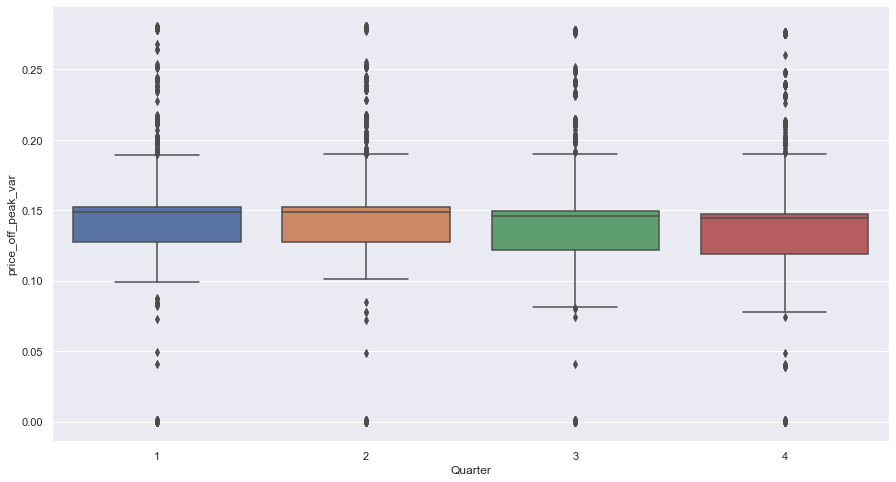

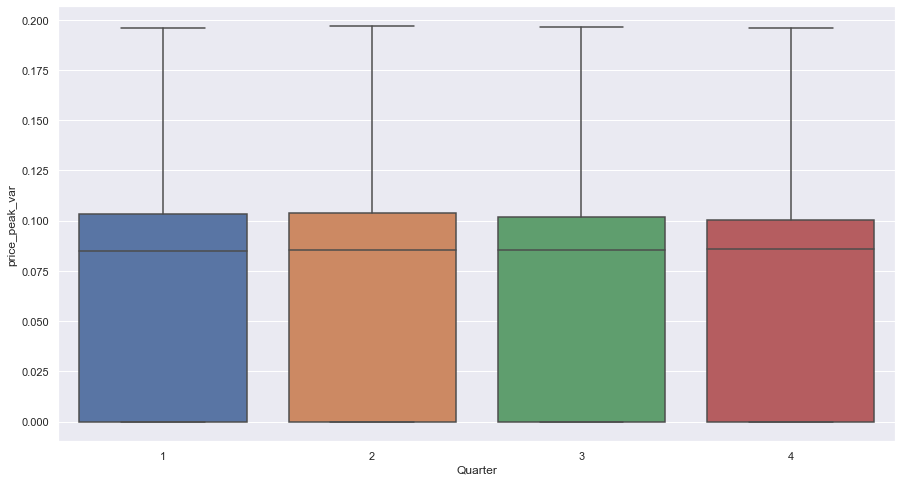

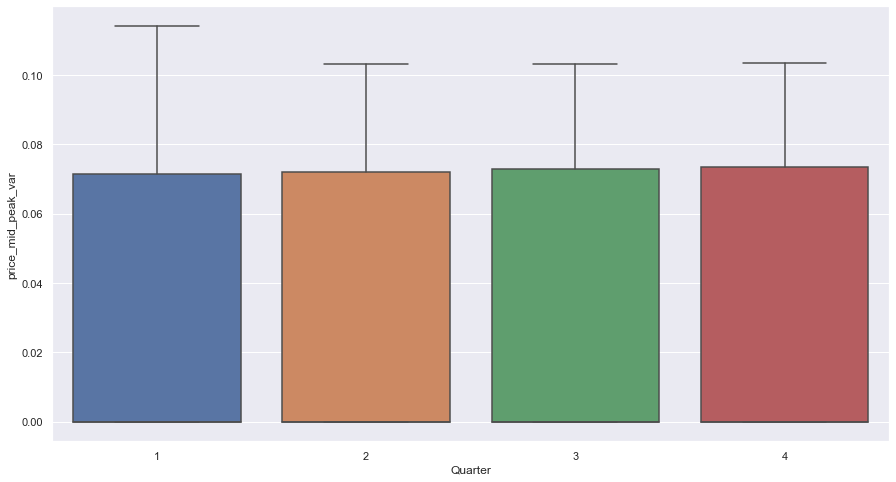

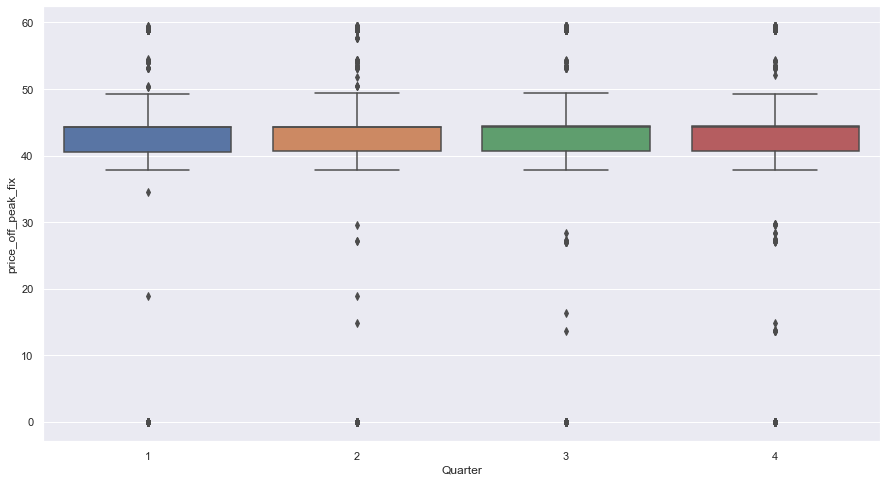

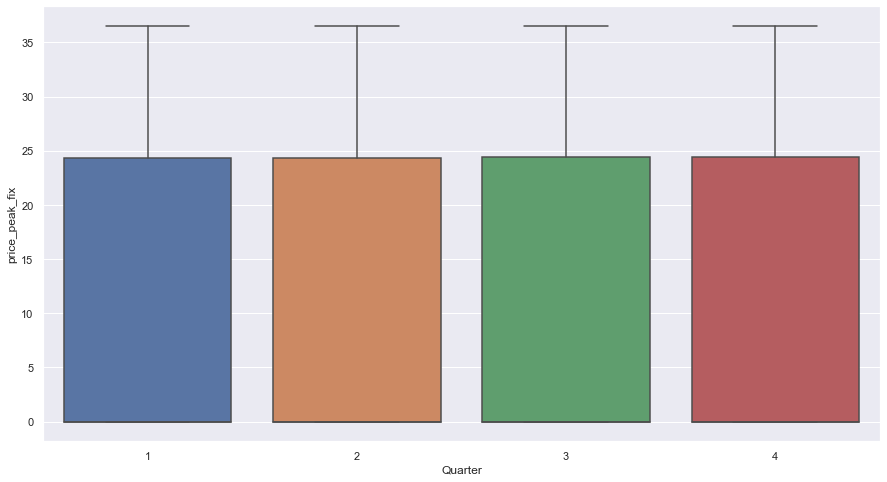

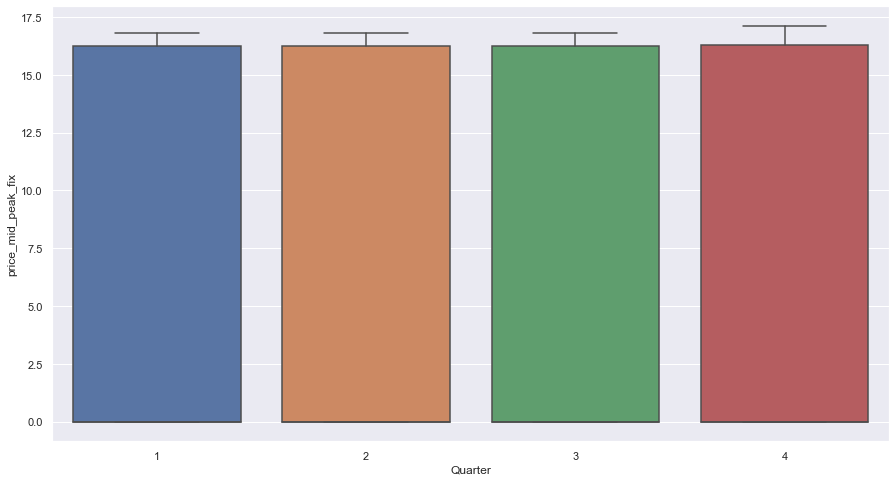

In [26]:
#Lets observe quarter wise peak, off-peak, and mid-peak consumption users quarter wise

dfp['Quarter']=dfp.price_date.apply(lambda x:x.quarter)
qt_df=dfp.groupby(['id','Quarter'],as_index=False).mean()

for i in qt_df.columns[2:]:
    plt.figure()
    sns.boxplot(x=qt_df.Quarter,y=qt_df[i])

In [27]:
### It seems like there is no variance in pricing with respect to quarter of year.
### As the data is for year 2015 only, so there wont be any year-wise comparision.

In [28]:
# Lets drop quarter column as it has become insignificant for our analysis

dfp.drop('Quarter',1,inplace=True)

In [29]:
#Create a month column for price_date.
dfp['Month']=dfp.price_date.apply(lambda x:x.month)


In [30]:
#It seems like the data is sorted according to customer and moths

### Lets define price sensitivity as difference between next month and present month divided by present month price.

In [31]:
price_sen_per=(dfp.iloc[:,2:8].diff(1)/dfp.iloc[:,2:8].shift(1))*100
price_sen_per=pd.concat([dfp['id'],price_sen_per,dfp['Month']],1)
price_sen_per.head(15)

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,Month
0,038af19179925da21a25619c5a24b745,NaN,NaN,NaN,NaN,NaN,NaN,1
1,038af19179925da21a25619c5a24b745,0.000000,NaN,NaN,0.000000,NaN,NaN,2
2,038af19179925da21a25619c5a24b745,0.000000,NaN,NaN,0.000000,NaN,NaN,3
3,038af19179925da21a25619c5a24b745,-1.150185,NaN,NaN,0.000000,NaN,NaN,4
4,038af19179925da21a25619c5a24b745,0.000000,NaN,NaN,0.000000,NaN,NaN,5
5,038af19179925da21a25619c5a24b745,0.000000,NaN,NaN,-0.000003,NaN,NaN,6
6,038af19179925da21a25619c5a24b745,0.464491,NaN,NaN,0.401609,NaN,NaN,7
7,038af19179925da21a25619c5a24b745,-2.968314,NaN,NaN,0.000000,NaN,NaN,8
8,038af19179925da21a25619c5a24b745,0.000000,NaN,NaN,0.000000,NaN,NaN,9
9,038af19179925da21a25619c5a24b745,0.000000,NaN,NaN,0.000000,NaN,NaN,10


#Problem with this dataframe is for a different customer the difference is taken so when a new customer is encountred lets make
#it null column as there is no previous data available for that.

el=list()
for i in price_sen_per.index:
    if i!=len(price_sen_per)-1:
        if price_sen_per.id[i]!=price_sen_per.id[i+1]:
            el.append(i+1)
        


earr=np.empty(6)
earr[:]=np.nan
for i in el:
    price_sen_per.iloc[i,1:7]=earr

In [32]:
# Storing it as a csv file
#price_sen_per.to_csv('Price_Sensitivity.csv',index=False)

In [33]:
#Lets check for overall price effect on churn
month_cnt=dfp.groupby(['id'],as_index=False)['Month'].count()
month_cnt[month_cnt.Month!=12].head()
# There are certain customers who doesnt have year long transaction.
#Lets merge this data with a group by sum of data for further analysis.

,id,Month
86,0117022254b01c36da23c5329a97e653,11
171,02bc81ecebcc8328dba4bf07bd6b6d55,11
333,0580216fd8b3a562087d52673f6ba63d,11
493,07cf5cb6081706df0be8b5512bc18000,10
938,0e7e0352b2dc0c2d5576bd9daaa4c609,11


In [34]:
#Lets group the data year wise and calculate sum for each customer.
yr_df=dfp.groupby(['id'],as_index=False).sum()
yr_df.drop('Month',1,inplace=True)
yr_df.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,1.492061,1.245525,0.877924,488.420789,293.052462,195.368327
1,0004351ebdd665e6ee664792efc4fd13,1.757118,0.000000,0.000000,532.625404,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,2.178702,0.000000,0.000000,543.836520,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,1.425085,1.179509,0.828384,487.769130,292.661462,195.107656
4,00114d74e963e47177db89bc70108537,1.775110,0.000000,0.000000,531.203164,0.000000,0.000000


In [35]:
yr_df.shape,month_cnt.shape  #Equality of records.Merging will be lossless.

((16096, 7), (16096, 2))

In [36]:
sum_df=pd.merge(yr_df,month_cnt,on='id')
sum_df['Total_var']=sum_df.iloc[:,1:4].sum(axis=1)
sum_df['Total_fix']=sum_df.iloc[:,4:7].sum(axis=1)

In [37]:
sum_df.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,Month,Total_var,Total_fix
0,0002203ffbb812588b632b9e628cc38d,1.492061,1.245525,0.877924,488.420789,293.052462,195.368327,12,3.615510,976.841578
1,0004351ebdd665e6ee664792efc4fd13,1.757118,0.000000,0.000000,532.625404,0.000000,0.000000,12,1.757118,532.625404
2,0010bcc39e42b3c2131ed2ce55246e3c,2.178702,0.000000,0.000000,543.836520,0.000000,0.000000,12,2.178702,543.836520
3,0010ee3855fdea87602a5b7aba8e42de,1.425085,1.179509,0.828384,487.769130,292.661462,195.107656,12,3.432978,975.538248
4,00114d74e963e47177db89bc70108537,1.775110,0.000000,0.000000,531.203164,0.000000,0.000000,12,1.775110,531.203164


In [38]:
sum_df.rename(columns={'Month':'Month_Count'},inplace=True)

In [39]:
#Lets merge this with original dataframe

dfc.shape,sum_df.shape

#This shows there are certain company id present in price dataset(price_df) which are not present in client dataset(client_df)
#Merging will result in data losses.

((14606, 26), (16096, 10))

In [40]:
dft=pd.merge(dfc,sum_df,on='id')
dft.shape

(14606, 35)

In [41]:
dft.head(2)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,churn,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,Month_Count,Total_var,Total_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,1,1.497445,1.208992,0.798365,491.307186,268.224124,178.816084,12,3.504802,938.347394
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0,1.795307,0.085483,0.000000,531.736503,0.000000,0.000000,12,1.880790,531.736503


## Corelation check for price paid by each customer for a year affecting churn

In [42]:
# First step would be finding out all columns which define price of product.
df=dft.copy()

In [43]:

df_price=df.iloc[:,25:35]
df_price.churn=df_price.churn.astype('int')
df_price.head(2)

,churn,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,Month_Count,Total_var,Total_fix
0,1,1.497445,1.208992,0.798365,491.307186,268.224124,178.816084,12,3.504802,938.347394
1,0,1.795307,0.085483,0.000000,531.736503,0.000000,0.000000,12,1.880790,531.736503


In [44]:
df_price.corr()

,churn,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,Month_Count,Total_var,Total_fix
churn,1.000000,-0.007860,0.029280,0.046249,0.014435,0.046952,0.044533,-0.023343,0.039546,0.051520
price_off_peak_var,-0.007860,1.000000,-0.316327,-0.607230,0.664889,-0.629758,-0.607400,0.080187,-0.200873,-0.488141
price_peak_var,0.029280,-0.316327,1.000000,0.822323,-0.209816,0.810536,0.815556,0.002376,0.971263,0.797857
price_mid_peak_var,0.046249,-0.607230,0.822323,1.000000,-0.286856,0.987688,0.991539,-0.005015,0.849157,0.963791
price_off_peak_fix,0.014435,0.664889,-0.209816,-0.286856,1.000000,-0.227803,-0.331147,0.103558,-0.076908,-0.039050
price_peak_fix,0.046952,-0.629758,0.810536,0.987688,-0.227803,1.000000,0.974097,-0.005546,0.828465,0.978708
price_mid_peak_fix,0.044533,-0.607400,0.815556,0.991539,-0.331147,0.974097,1.000000,-0.005685,0.840486,0.947945
Month_Count,-0.023343,0.080187,0.002376,-0.005015,0.103558,-0.005546,-0.005685,1.000000,0.023556,0.019123
Total_var,0.039546,-0.200873,0.971263,0.849157,-0.076908,0.828465,0.840486,0.023556,1.000000,0.851493
Total_fix,0.051520,-0.488141,0.797857,0.963791,-0.039050,0.978708,0.947945,0.019123,0.851493,1.000000


In [45]:
price_sen=pd.read_csv('Price_Sensitivity.csv')
price_sen.head(13)

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,Month
0,038af19179925da21a25619c5a24b745,NaN,NaN,NaN,NaN,NaN,NaN,1
1,038af19179925da21a25619c5a24b745,0.000000,NaN,NaN,0.000000,NaN,NaN,2
2,038af19179925da21a25619c5a24b745,0.000000,NaN,NaN,0.000000,NaN,NaN,3
3,038af19179925da21a25619c5a24b745,-1.150185,NaN,NaN,0.000000,NaN,NaN,4
4,038af19179925da21a25619c5a24b745,0.000000,NaN,NaN,0.000000,NaN,NaN,5
5,038af19179925da21a25619c5a24b745,0.000000,NaN,NaN,-0.000003,NaN,NaN,6
6,038af19179925da21a25619c5a24b745,0.464491,NaN,NaN,0.401609,NaN,NaN,7
7,038af19179925da21a25619c5a24b745,-2.968314,NaN,NaN,0.000000,NaN,NaN,8
8,038af19179925da21a25619c5a24b745,0.000000,NaN,NaN,0.000000,NaN,NaN,9
9,038af19179925da21a25619c5a24b745,0.000000,NaN,NaN,0.000000,NaN,NaN,10


In [46]:
price_sen[price_sen.price_off_peak_var==np.inf].head()
#These are the values for which previous price is 0, after price is 0 , so its giving a Infinite value
#So it comes under value greater than 0 which van be misleading.
#Lets replace them with 0 as 0 means no change in price sensitivity

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,Month
11231,17bf5be2125f6e81b22e9121f58ad873,inf,inf,inf,0.0,0.0,0.0,4
16813,a8909ca0c4a85f075fc91b55a68cd11c,inf,inf,inf,inf,inf,inf,11
18625,793577ee238c6d5dac50c4d968e02421,inf,NaN,NaN,inf,NaN,NaN,12
27664,2f527996b16726de6db3f2b5b33746e2,inf,inf,NaN,inf,NaN,NaN,11
30012,c89261a0d934d2257420fff7292db0c0,inf,inf,inf,inf,inf,inf,10


In [47]:
price_sen.replace({np.inf:0},inplace=True)
price_sen[price_sen.price_off_peak_var==np.inf].head()
#They are removed from our dataframe.

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,Month


In [48]:
cols=price_sen.columns[1:7]

In [49]:
#Lets define various derived parameters from price sensitvity

#price_sen_negative_values_count=count of all negative price sensitivity for a given customer
#price_sen_negative_value_sum=sum of all negative price sensitivity for a given customer
#Price_sen_negative_value_avg=price_sen_negative_value_sum/price_sen_negative_values_count

#Similar for postive price sensitivity

#price_sen_negative_values_max=maximum negative price sensitivity(least negative value)
#price_sen_positive_values_max=maximul positive price sensitivity (largest positive value.)

In [50]:
price_sen_negative_values_count=price_sen.groupby('id')[cols].apply(lambda x:x[x<0].count())

In [51]:
price_sen_negative_values_sum=price_sen.groupby('id')[cols].apply(lambda x:x[x<0].sum())

In [52]:
price_sen_positive_values_count=price_sen.groupby('id')[cols].apply(lambda x:x[x>0].count())

In [53]:
price_sen_positive_values_sum=price_sen.groupby('id')[cols].apply(lambda x:x[x>0].sum())

In [54]:
price_sen_negative_value_avg=price_sen_negative_values_sum/price_sen_negative_values_count
price_sen_positive_value_avg=price_sen_positive_values_sum/price_sen_positive_values_count

In [55]:
price_sen_negative_value_max=price_sen.groupby('id')[cols].apply(lambda x:x[x<0].min())
price_sen_positive_value_max=price_sen.groupby('id')[cols].apply(lambda x:x[x>0].max())

In [56]:
target=dft[['id','churn']] #Creation churn as our target variable.
target.churn=target.churn.astype('int')

## Corelation for various parameters obtained above

In [57]:
def cdata(ps_df,y=target):
    ps_df=pd.merge(ps_df,target,on='id')
    x=ps_df.corr().iloc[:,-1]
    return x

In [58]:
cdata(price_sen_positive_value_avg)

price_off_peak_var   -0.006521
price_peak_var        0.028554
price_mid_peak_var   -0.000535
price_off_peak_fix    0.019123
price_peak_fix       -0.007635
price_mid_peak_fix   -0.010646
churn                 1.000000
Name: churn, dtype: float64

In [59]:
cdata(price_sen_negative_value_avg)

price_off_peak_var   -0.030125
price_peak_var        0.004715
price_mid_peak_var   -0.012413
price_off_peak_fix   -0.027530
price_peak_fix       -0.006861
price_mid_peak_fix   -0.010058
churn                 1.000000
Name: churn, dtype: float64

In [60]:
cdata(price_sen_positive_value_max)

price_off_peak_var   -0.006365
price_peak_var        0.029164
price_mid_peak_var    0.003336
price_off_peak_fix    0.022482
price_peak_fix        0.001261
price_mid_peak_fix   -0.004389
churn                 1.000000
Name: churn, dtype: float64

In [61]:
cdata(price_sen_negative_value_max)

price_off_peak_var   -0.025631
price_peak_var        0.001762
price_mid_peak_var   -0.013134
price_off_peak_fix   -0.026472
price_peak_fix       -0.010094
price_mid_peak_fix   -0.012849
churn                 1.000000
Name: churn, dtype: float64

In [62]:
import statsmodels.tsa.api as smt

In [63]:
df_date=dfp.groupby('price_date').mean()
df_date.head(2)

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,Month
price_date,,,,,,,
2015-01-01,0.142568,0.054950,0.030333,43.226643,10.692921,6.455861,1
2015-02-01,0.142767,0.055053,0.030367,43.238161,10.673719,6.449016,2


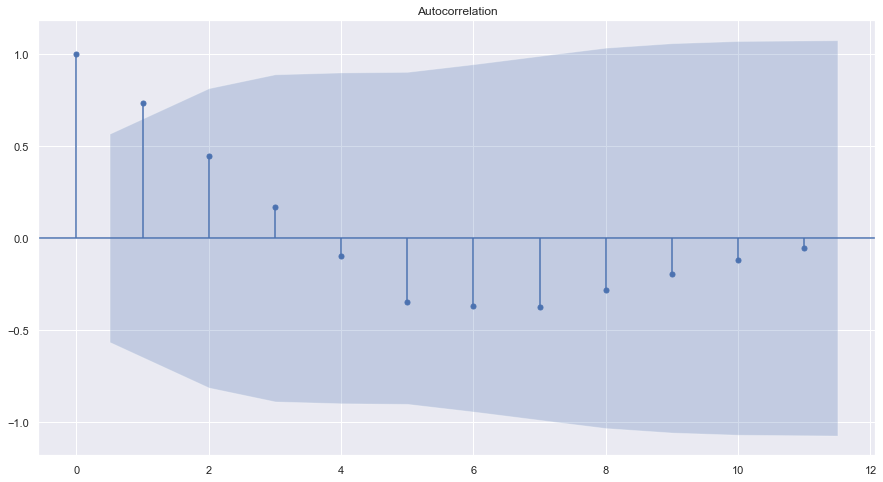

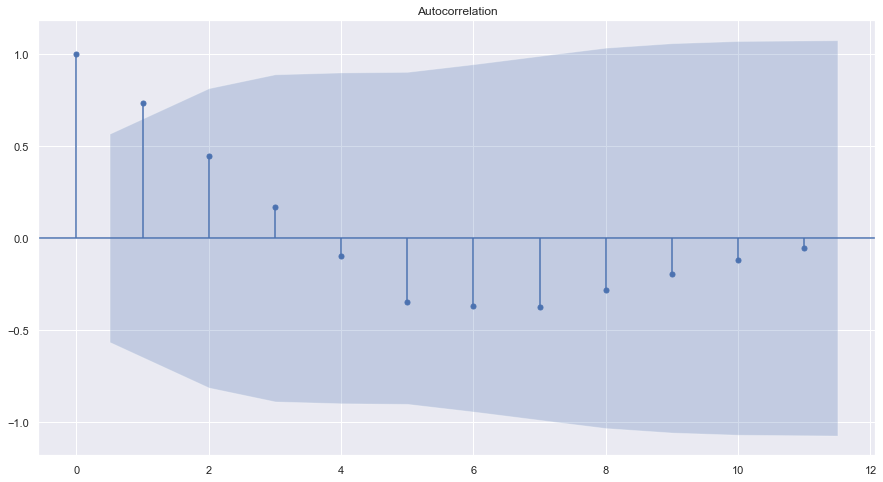

In [64]:
smt.graphics.plot_acf(df_date.iloc[:,0])

In [65]:
# No proper patterns found.

In [66]:
# Lets find a difference between first and last month divided by first month to get price sensitivity

In [67]:
first_value=dfp.groupby('id').first()
last_value=dfp.groupby('id').last()

In [68]:
first_value.head()

,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,Month
id,,,,,,,,
0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389,1
0004351ebdd665e6ee664792efc4fd13,2015-01-01,0.148047,0.000000,0.000000,44.266931,0.000000,0.000000,1
0010bcc39e42b3c2131ed2ce55246e3c,2015-01-01,0.150837,0.000000,0.000000,44.444710,0.000000,0.000000,1
0010ee3855fdea87602a5b7aba8e42de,2015-01-01,0.123086,0.100505,0.068646,40.565969,24.339581,16.226389,1
00114d74e963e47177db89bc70108537,2015-01-01,0.149434,0.000000,0.000000,44.266931,0.000000,0.000000,1


In [69]:
price_sen_year=(last_value.iloc[:,1:7]-first_value.iloc[:,1:7])

In [70]:
price_sen_year=pd.merge(price_sen_year,target,on='id')
price_sen_year.head(2)

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn
0,0002203ffbb812588b632b9e628cc38d,-0.006192,-0.002302,0.003487,0.162916,0.097749,0.065166,0
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.000000,0.000000,0.177779,0.000000,0.000000,0


In [71]:
price_sen_year.corr().iloc[:,-1]

price_off_peak_var   -0.001064
price_peak_var       -0.004041
price_mid_peak_var    0.000191
price_off_peak_fix    0.002672
price_peak_fix       -0.005183
price_mid_peak_fix   -0.002681
churn                 1.000000
Name: churn, dtype: float64

In [72]:
# We found price_sen_negative_values_avg to have maximum correlation with churn for price_off_peak_var and price_off_peak_fix
#Similar pattern is obserbed for off-peak values.
#Also in our dft dataframe we have defined groupby sum of every price for every customer, they all have comparable correlation.


In [73]:
#Lets aggregate all the columns having maximum correlation with churn.

c1=price_sen_negative_value_avg.iloc[:,[0,3]]
c1.columns=['off_peak_energy_negative_avg','off_peak_power_negative_avg']

c2=price_sen_negative_value_max.iloc[:,[0,3]]
c2.columns=['off_peak_energy_negative_max','off_peak_power_negative_max']



c3=price_sen_positive_value_avg.iloc[:,[0,3]]
c3.columns=['off_peak_energy_positive_avg','off_peak_power_positive_avg']


c4=price_sen_positive_value_max.iloc[:,[0,3]]
c4.columns=['off_peak_energy_positive_max','off_peak_power_positive_max']


In [74]:
dft=pd.merge(dft,c1,on='id')
dft=pd.merge(dft,c2,on='id')
dft=pd.merge(dft,c3,on='id')
dft=pd.merge(dft,c4,on='id')
dft.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,Total_var,Total_fix,off_peak_energy_negative_avg,off_peak_power_negative_avg,off_peak_energy_negative_max,off_peak_power_negative_max,off_peak_energy_positive_avg,off_peak_power_positive_avg,off_peak_energy_positive_max,off_peak_power_positive_max
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,3.504802,938.347394,-3.381130,NaN,-6.495543,NaN,24.305621,3.029476,24.305621,8.686820
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,1.880790,531.736503,-1.770692,-0.000003,-2.947802,-0.000003,1.073045,0.401609,1.073045,0.401609
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,3.107195,532.625404,-1.354201,NaN,-2.684050,NaN,NaN,0.401606,NaN,0.401606
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,1.814521,532.803183,-1.485466,NaN,-2.915425,NaN,NaN,0.401606,NaN,0.401606
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,3.608133,976.515746,-6.372446,NaN,-6.372446,NaN,1.561484,0.401607,1.561484,0.401607


In [75]:
dft.replace(np.nan,0,inplace=True)

In [76]:
dft.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,Total_var,Total_fix,off_peak_energy_negative_avg,off_peak_power_negative_avg,off_peak_energy_negative_max,off_peak_power_negative_max,off_peak_energy_positive_avg,off_peak_power_positive_avg,off_peak_energy_positive_max,off_peak_power_positive_max
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,3.504802,938.347394,-3.381130,0.000000,-6.495543,0.000000,24.305621,3.029476,24.305621,8.686820
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,1.880790,531.736503,-1.770692,-0.000003,-2.947802,-0.000003,1.073045,0.401609,1.073045,0.401609
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,3.107195,532.625404,-1.354201,0.000000,-2.684050,0.000000,0.000000,0.401606,0.000000,0.401606
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,1.814521,532.803183,-1.485466,0.000000,-2.915425,0.000000,0.000000,0.401606,0.000000,0.401606
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,3.608133,976.515746,-6.372446,0.000000,-6.372446,0.000000,1.561484,0.401607,1.561484,0.401607


In [77]:
#lets store this file which will help us in modelling
#dft.to_csv('Feature_Engineered_Data.csv',index=False)

In [95]:
dft.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix',
       'Month_Count', 'Total_var', 'Total_fix', 'off_peak_energy_negative_avg',
       'off_peak_power_negative_avg', 'off_peak_energy_negative_max',
       'off_peak_power_negative_max', 'off_peak_energy_positive_avg',
       'off_peak_power_positive_avg', 'off_peak_energy_positive_max',
       'off_peak_power_positive_max'],
      dtyp